In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from trader import Trader
from datamodel import OrderDepth, UserId, TradingState, Order, Listing
from backtester import get_tradehistory, get_mytrades, get_pnl

In [2]:
price = pd.read_csv("data/prices_day_4.csv", sep=";")
infile = r"data/trade8.log"
hist = get_tradehistory(infile)
mytrades = get_mytrades(hist).reset_index(drop=True)
mp = price.loc[price["product"]=="AMETHYSTS"]

In [3]:
pnls = get_pnl(mytrades, mp["timestamp"], mp)
pnl_true = mp["profit_and_loss"]

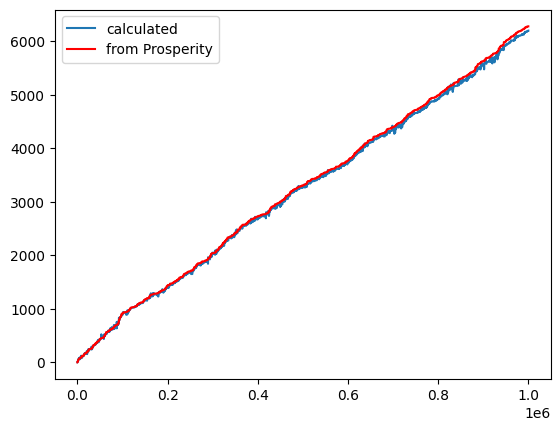

In [4]:
plt.plot(mp["timestamp"], pnls, label="calculated")
plt.plot(mp["timestamp"], pnl_true, color='r', label="from Prosperity")
plt.legend()
plt.show()

Exchange

In [18]:
time = 100
price_current = price.loc[price["timestamp"]==time]

In [19]:
price_current

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
9,4,100,COCONUT,9885,101,9884.0,42.0,NaN,NaN,9886,101,9887.0,42.0,NaN,NaN,9885.5,0.0
10,4,100,CHOCOLATE,7831,98,NaN,NaN,NaN,NaN,7832,48,7833.0,50.0,NaN,NaN,7831.5,0.0
11,4,100,COCONUT_COUPON,575,39,NaN,NaN,NaN,NaN,576,39,NaN,NaN,NaN,NaN,575.5,0.0
12,4,100,STRAWBERRIES,3957,155,NaN,NaN,NaN,NaN,3959,155,NaN,NaN,NaN,NaN,3958.0,0.0
13,4,100,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,9998,1,10002.0,8.0,10004.0,1.0,9997.0,0.0
14,4,100,ROSES,13712,65,NaN,NaN,NaN,NaN,13713,20,13714.0,45.0,NaN,NaN,13712.5,0.0
15,4,100,STARFRUIT,4906,1,4905.0,25.0,NaN,NaN,4912,26,NaN,NaN,NaN,NaN,4909.0,0.0
16,4,100,ORCHIDS,1099,10,1097.0,2.0,1090.0,53.0,1107,10,1109.0,2.0,1116.0,53.0,1103.0,0.0
17,4,100,GIFT_BASKET,69125,1,69124.0,18.0,69123.0,20.0,69136,1,69137.0,18.0,69138.0,20.0,69130.5,0.0


In [38]:
df = price_current.loc[price_current["product"]=="AMETHYSTS"]

In [25]:
from typing import Dict, List

Time = int
Symbol = str
Product = str
Position = int
UserId = str
ObservationValue = int

In [54]:
listings: Dict[Symbol, Listing] = {}
order_depths: Dict[Symbol, OrderDepth] = {}

for _, listing in price_current.iterrows():
    prod = listing["product"]
    
    listings[prod] = Listing(
        symbol=prod, product=prod, denomination="SEASHELLS")
    buy_o, sell_o = {}, {}

    for i in range(1, 4):
        price = "bid_price_" + str(i)
        vol = "bid_volume_" + str(i)
        if not np.isnan(listing[price]):
            buy_o[listing[price]] = listing[vol]
    for i in range(1, 4):
        price = "ask_price_" + str(i)
        vol = "ask_volume_" + str(i)
        if not np.isnan(listing[price]):
            sell_o[listing[price]] = listing[vol]

    order_depths[prod] = OrderDepth(
        buy_orders=buy_o, sell_orders=sell_o)
    
    # TODO: own_trades, market_trades
    # get position from own_trades

In [ ]:
trading_state = (traderData="local",
timestamp=100,
listings: Dict[Symbol, Listing],
order_depths: Dict[Symbol, OrderDepth],
own_trades: Dict[Symbol, List[Trade]],
market_trades: Dict[Symbol, List[Trade]],
position: Dict[Product, Position],
observations: Observation)